# Solicitacao da materia de IA

Para o entregável da nossa disciplina, vocês realizarão todas as etapas que fazem parte do dia a dia de um cientista
de dados. São fornecidos 4 arquivos csv (Teams e Portal) com diferentes informações sobre poluição envolvendo
plástico, e um arquivo com informações de qualidade de água para diferentes regiões. Uma coluna em comum
entre todas as bases (chave primária) de dados é a coluna Entidade, que contém o nome do país associado.

# Requisitos:
╸ [30 pts] Fazer uma análise exploratória de dados com os arquivos 1 a 4 (ao menos um gráfico para cada
arquivo), gerando visualizações que possam trazer insights sobre a relação do plástico com o oceano e a
poluição.

╸ [30 pts] Queremos treinar um modelo de ML para predizer a qualidade da água do oceano com base em
dados de plástico. Combine o arquivo 5 com os arquivos de 1 a 4 (se guiando pela chave primária, e
lembrando que dados do mundo real possuem problemas que precisam de atenção especial). Após juntar os
dados, treine um modelo para predizer a qualidade da água com base nas outras colunas.

In [1]:
## Importaçao das bibliotecas

# Analise dos dados
import pandas as pd


# Gerar gráficos 
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Analise da producao de plastico



## 1.1 Dados que estao disponiveis neste arquivo

•	Entidade: Nome do país ou região (no caso dos primeiros registros, “Mundo”).

•	Ano: O ano de registro da produção.

•	Produção Anual de Plástico: Quantidade de plástico produzido, estamos fazendo referencia em toneladas.

## 1.2 Carregar os dados

In [2]:

# Carregar o arquivo CSV
df_producao_plastico = pd.read_csv('1- producao-de-plastico-global.csv')

# Exibir as primeiras  cinco linhas do dataframe e informações gerais para entendermos melhor o problema
df_producao_plastico.head()

,Entidade,Ano,Produção Anual de Plástico
0,Mundo,1950,2000000
1,Mundo,1951,2000000
2,Mundo,1952,2000000
3,Mundo,1953,3000000
4,Mundo,1954,3000000


## 1.3 Criar o gráfico

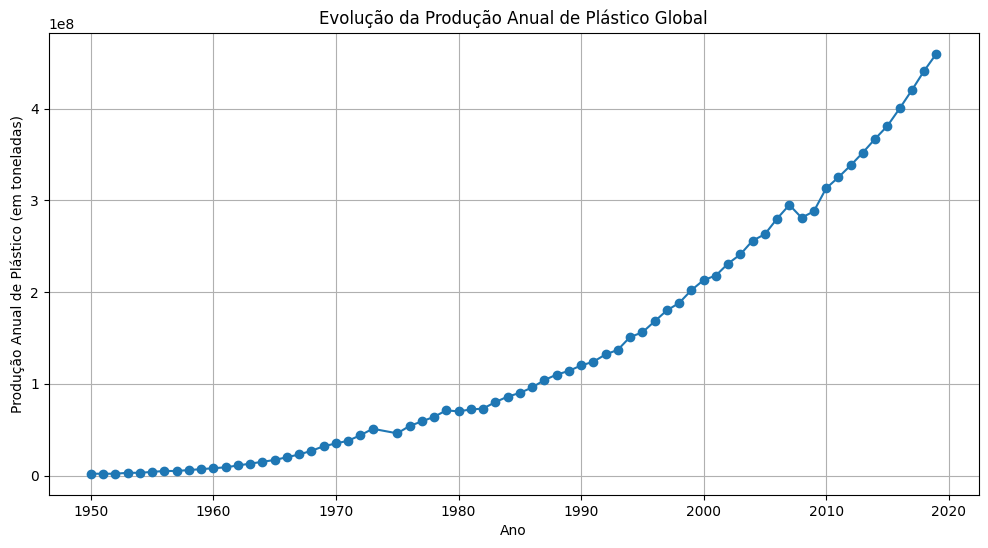

In [3]:

# Criacao um grafico de linha para visualizar a produção de plástico ao longo dos anos
plt.figure(figsize=(12, 6))
plt.plot(df_producao_plastico['Ano'], df_producao_plastico['Produção Anual de Plástico'], marker='o')
plt.title('Evolução da Produção Anual de Plástico Global')
plt.xlabel('Ano')
plt.ylabel('Produção Anual de Plástico (em toneladas)')
plt.grid(True)
plt.show()

## 1.4 Análise sobre o tema Produçao de Plastico



O gráfico mostra a evolução da produção anual de plástico global ao longo dos anos. É evidente um aumento significativo na produção à medida que avançamos no tempo, o que pode ser um indicativo da crescente contribuição para a poluição por plástico, especialmente nos oceanos. Os dados iniciaram em 1950 e temos uma base ate 2020, o que mostra uma base bem consolidade de quase 70 anos. O numero vem so aumentando e somente tivemos melhorias mas curtas nos anos 70,80,2008 aproximadamente.

# 2. Analise Despejo de resíduos

## 2.1 Dados que estao disponiveis neste arquivo

•	Entidade: Nome do país ou região.

•	Código: Código do país (alguns valores estão faltando). Esse codigo sera nosso ID principal.

•	Ano: Ano do registro de dados.

•	Participação na emissão global de plásticos para o oceano: Percentual que cada entidade contribui para a emissão global de plásticos no oceano.

## 2.2 Carregar os dados

In [4]:

df_residuos = pd.read_csv('2- participacao-despejo-residuo-plastico.csv')

df_residuos.head()

,Entidade,Código,Ano,Participação na emissão global de plásticos para o oceano
0,Africa,NaN,2019,7.989317
1,Albania,ALB,2019,0.159782
2,Algeria,DZA,2019,0.589510
3,Angola,AGO,2019,0.087804
4,Antigua and Barbuda,ATG,2019,0.000204


## 2.3 Criar o gráfico

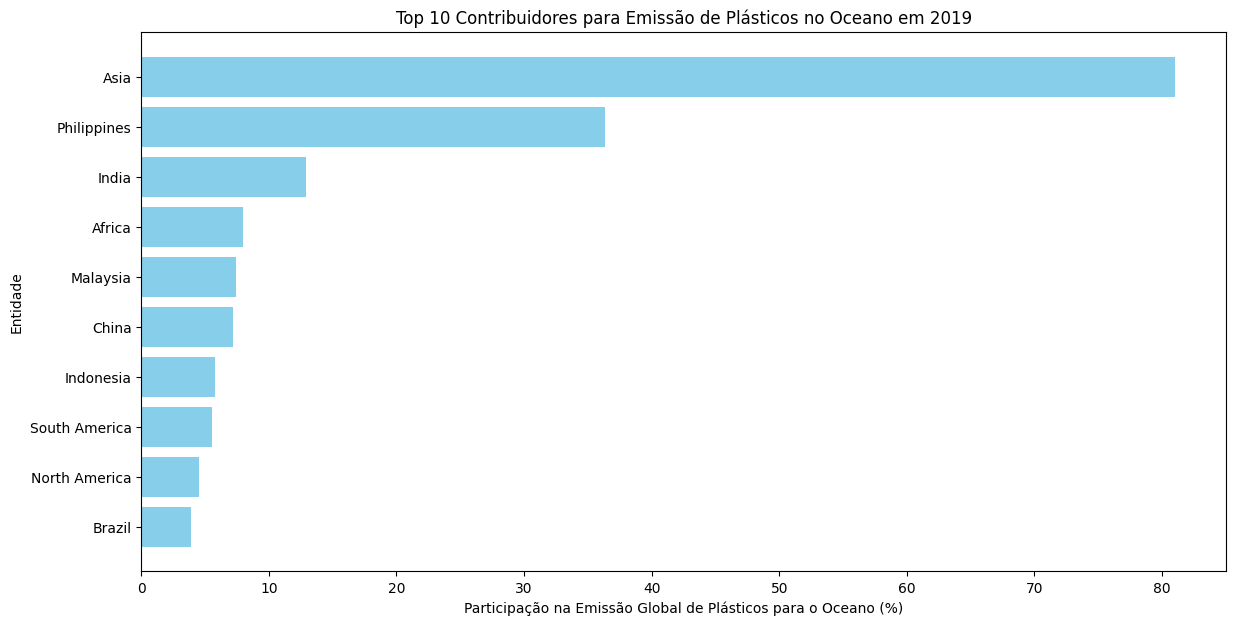

In [5]:
# Filtrar os dados para o ano mais recente disponível, 2019. Nao desejo saber dos demais aqui, por hora.
data_2019 = df_residuos[df_residuos['Ano'] == 2019]

# Ordenar os dados pelo percentual de emissão de plásticos para o oceano
sorted_data_2019 = data_2019.sort_values(by='Participação na emissão global de plásticos para o oceano', ascending=False).head(10)

# Criar um gráfico de barras
plt.figure(figsize=(14, 7))
plt.barh(sorted_data_2019['Entidade'], sorted_data_2019['Participação na emissão global de plásticos para o oceano'], color='skyblue')
plt.title('Top 10 Contribuidores para Emissão de Plásticos no Oceano em 2019')
plt.xlabel('Participação na Emissão Global de Plásticos para o Oceano (%)')
plt.ylabel('Entidade')
plt.gca().invert_yaxis()  # Inverter o eixo y para o maior contribuidor aparecer no topo
plt.show()

# 2.4 Analise final sobre os residuos

No gráfico acima, mostramos os 10 principais contribuidores para a emissão de plásticos no oceano no ano de 2019. Esta visualização ajuda a destacar quais países ou regiões são responsáveis por uma maior parcela da poluição plástica oceânica global, fornecendo insights importantes para possíveis áreas de foco em esforços de limpeza ou regulamentação.

# 3. Analise sobre o Destino dos plasticos



## 3.1 Dados que estao disponiveis neste arquivo


•	Entidade: Nome do país ou região.

•	Código: Código do país (com muitos valores faltantes).

•	Ano: Ano dos dados.

•	Participação da reciclagem do lixo total regional: Percentual do lixo que foi reciclado na região.

•	Participação da queima do lixo total regional: Percentual do lixo que foi queimado na região.

•	Participação do lixo descartado e mal gerido do total regional: Percentual do lixo que foi descartado ou mal gerido.

•	Participação do lixo encaminhado para aterros do total regional: Percentual do lixo que foi encaminhado para aterros.

## 3.2 Carregar os dados

In [6]:

df_destino = pd.read_csv('3- destino-plastico.csv')

df_destino.head(), df_destino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entidade                                                          200 non-null    object 
 1    Código                                                           80 non-null     object 
 2    Ano                                                              200 non-null    int64  
 3    Participação da reciclagem do lixo total regional                200 non-null    float64
 4    Participação da queima do lixo total regional                    200 non-null    float64
 5    Participação do lixo descartado e mal gerido do total regional   200 non-null    float64
 6    Participação do lixo encaminhado para aterros do total regional  200 non-null    float64
dtypes: float64(4), int64(1), object(2)
m

(               Entidade  Código   Ano  \
 0  Americas (excl. USA)     NaN  2000   
 1  Americas (excl. USA)     NaN  2001   
 2  Americas (excl. USA)     NaN  2002   
 3  Americas (excl. USA)     NaN  2003   
 4  Americas (excl. USA)     NaN  2004   
 
     Participação da reciclagem do lixo total regional  \
 0                                           4.721963    
 1                                           4.972505    
 2                                           5.227469    
 3                                           5.482511    
 4                                           5.740007    
 
     Participação da queima do lixo total regional  \
 0                                        1.220057   
 1                                        1.208672   
 2                                        1.197566   
 3                                        1.186352   
 4                                        1.175283   
 
     Participação do lixo descartado e mal gerido do total regional  \

## 3.3 Criar o gráfico

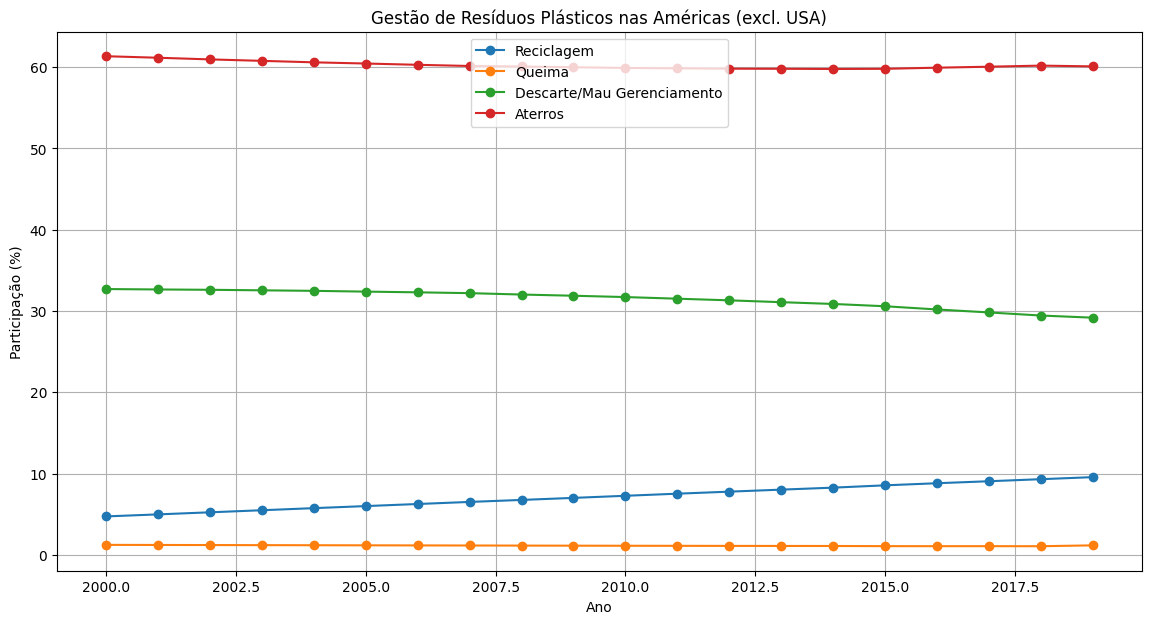

In [7]:
# Corrigir o nome das colunas (removendo espaços adicionais)
df_destino.columns = df_destino.columns.str.strip()

# Refazer a filtragem para a região "Americas (excl. USA)"
americas_data = df_destino[df_destino['Entidade'] == 'Americas (excl. USA)']

# Criar novamente o gráfico de linhas para visualizar as tendências na gestão de resíduos
plt.figure(figsize=(14, 7))
plt.plot(americas_data['Ano'], americas_data['Participação da reciclagem do lixo total regional'], label='Reciclagem', marker='o')
plt.plot(americas_data['Ano'], americas_data['Participação da queima do lixo total regional'], label='Queima', marker='o')
plt.plot(americas_data['Ano'], americas_data['Participação do lixo descartado e mal gerido do total regional'], label='Descarte/Mau Gerenciamento', marker='o')
plt.plot(americas_data['Ano'], americas_data['Participação do lixo encaminhado para aterros do total regional'], label='Aterros', marker='o')
plt.title('Gestão de Resíduos Plásticos nas Américas (excl. USA)')
plt.xlabel('Ano')
plt.ylabel('Participação (%)')
plt.legend()
plt.grid(True)
plt.show()

# 3.4 Analise final sobre o Destino do Plástico

O gráfico acima ilustra as tendências na gestão de resíduos plásticos na região das Américas (excluindo os EUA) ao longo dos anos. Ele mostra a participação percentual de diferentes métodos de tratamento de resíduos, incluindo reciclagem, queima, descarte/mal gerenciamento e encaminhamento para aterros.

Podemos observar que, apesar de uma tendência de aumento na reciclagem, uma grande parte dos resíduos ainda é descartada ou mal gerida, o que pode contribuir significativamente para a poluição plástica.

# 4. Analise sobre Desperdicio do plastico por pessoa / cabeca


## 4.1 Dados que estao disponiveis neste arquivo

•	Entidade: Nome do país ou região.

•	Código: Código do país (com alguns valores faltantes).

•	Ano: Ano dos dados.

•	Lixo plástico mal gerenciado por pessoa (kg por ano): Quantidade de lixo plástico mal gerenciado por pessoa em cada país, expresso em quilogramas por ano.

## 4.2 Carregar os dados

In [8]:

df_desperdicio = pd.read_csv('4- desperdicio-plastico-per-capita.csv')

df_desperdicio.head(), df_desperdicio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Entidade                                               165 non-null    object 
 1    Código                                                160 non-null    object 
 2    Ano                                                   165 non-null    int64  
 3    Lixo plástico mal gerenciado por pessoa (kg por ano)  165 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.3+ KB


(              Entidade  Código   Ano  \
 0               Africa     NaN  2019   
 1              Albania     ALB  2019   
 2              Algeria     DZA  2019   
 3               Angola     AGO  2019   
 4  Antigua and Barbuda     ATG  2019   
 
     Lixo plástico mal gerenciado por pessoa (kg por ano)  
 0                                          10.465928      
 1                                          24.239153      
 2                                          17.758995      
 3                                           7.445279      
 4                                           6.463918      ,
 None)

## 4.3 Criar o gráfico

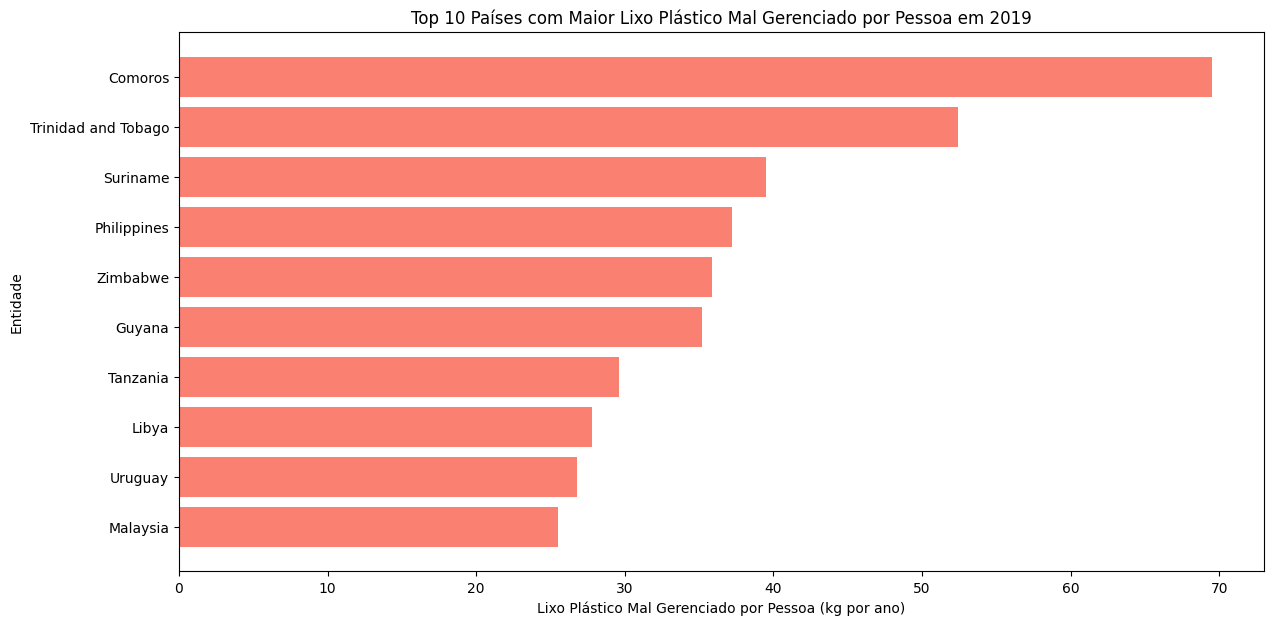

In [9]:
# Corrigir o nome das colunas (removendo espaços adicionais -  Isso gerou conflito na hora de gerar as informacoes)
df_desperdicio.columns = df_desperdicio.columns.str.strip()

# Refazer a filtragem para o ano 2019
data_2019_per_capita = df_desperdicio[df_desperdicio['Ano'] == 2019]

# Refazer a ordenação dos dados pela quantidade de lixo plástico mal gerenciado por pessoa
sorted_data_2019_per_capita = data_2019_per_capita.sort_values(by='Lixo plástico mal gerenciado por pessoa (kg por ano)', ascending=False).head(10)

# Criar novamente o gráfico de barras
plt.figure(figsize=(14, 7))
plt.barh(sorted_data_2019_per_capita['Entidade'], sorted_data_2019_per_capita['Lixo plástico mal gerenciado por pessoa (kg por ano)'], color='salmon')
plt.title('Top 10 Países com Maior Lixo Plástico Mal Gerenciado por Pessoa em 2019')
plt.xlabel('Lixo Plástico Mal Gerenciado por Pessoa (kg por ano)')
plt.ylabel('Entidade')
plt.gca().invert_yaxis()  # Inverter o eixo y para o maior contribuidor aparecer no topo
plt.show()

# 4.4 Analise final sobre Desperdicio de Plásticos per Capita 

O gráfico acima destaca os 10 países com o maior lixo plástico mal gerenciado por pessoa em 2019. Isso fornece uma visão clara de onde o gerenciamento de resíduos plásticos per capita é mais problemático e pode ajudar a direcionar esforços de intervenção e políticas para essas áreas.

# 5. Poluiçao da Agua e do Ar



## 5.1 Dados que estao disponiveis neste arquivo

•	Cidade: Nome da cidade.

•	Região: Região ou estado em que a cidade está localizada (com alguns valores faltantes).

•	Entidade: Nome do país.

•	Qualidade do Ar: Índice de qualidade do ar (valores numéricos).

•	Poluição da Água: Índice de poluição da água (valores numéricos).



## 5.2 Carregar os dados

In [10]:

df_poluicao_agua_ar = pd.read_csv('5- poluicao-agua-cidades.csv')

df_poluicao_agua_ar.head(), df_poluicao_agua_ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3963 entries, 0 to 3962
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Cidade             3963 non-null   object 
 1    Região            3538 non-null   object 
 2    Entidade          3963 non-null   object 
 3    Qualidade do Ar   3963 non-null   float64
 4    Poluição da Água  3963 non-null   float64
dtypes: float64(2), object(3)
memory usage: 154.9+ KB


(             Cidade                Região                  Entidade  \
 0     New York City              New York  United States of America   
 1  Washington, D.C.  District of Columbia  United States of America   
 2     San Francisco            California  United States of America   
 3            Berlin                   NaN                   Germany   
 4       Los Angeles            California  United States of America   
 
     Qualidade do Ar   Poluição da Água  
 0         46.816038          49.504950  
 1         66.129032          49.107143  
 2         60.514019          43.000000  
 3         62.364130          28.612717  
 4         36.621622          61.299435  ,
 None)

## 5.3 Criar o gráfico

### 5.3.1 Entender os dados

In [11]:
# Corrigir o nome das colunas (removendo espaços adicionais)
df_poluicao_agua_ar.columns = df_poluicao_agua_ar.columns.str.strip()



In [12]:
# Verificar valores faltantes
print(df_poluicao_agua_ar.isnull().sum())



Cidade                0
Região              425
Entidade              0
Qualidade do Ar       0
Poluição da Água      0
dtype: int64


In [13]:
# Estatísticas descritivas
print(df_poluicao_agua_ar.describe())

       Qualidade do Ar  Poluição da Água
count      3963.000000       3963.000000
mean         62.253452         44.635372
std          30.944753         25.663910
min           0.000000          0.000000
25%          37.686567         25.000000
50%          69.444444         50.000000
75%          87.500000         57.719393
max         100.000000        100.000000


### 5.3.2. Análise de Distribuição - Será gerado vários outros gráficos para explicar os números e resultado esperado.

Será analisado como a poluição da água e a qualidade do ar estão distribuídas entre as cidades. O objetivo é visualizar a distribuição desses índices e identificar possíveis outliers.

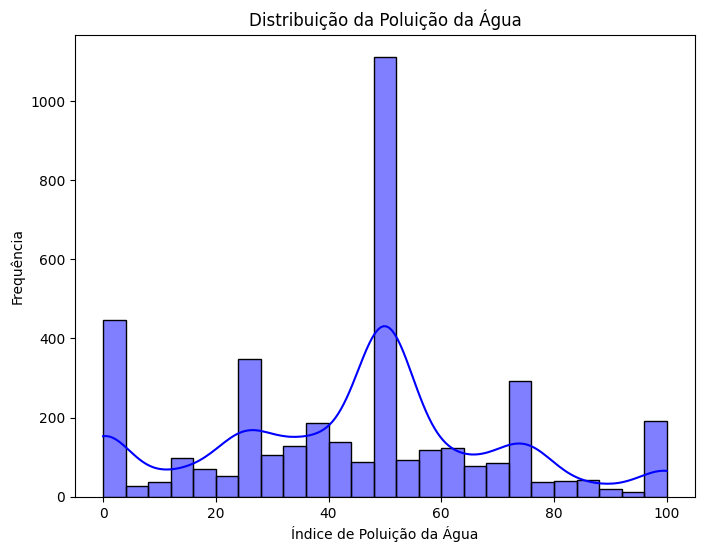

In [14]:
# Histograma da Poluição da Água
plt.figure(figsize=(8, 6))
sns.histplot(df_poluicao_agua_ar['Poluição da Água'], kde=True, color='blue')
plt.title('Distribuição da Poluição da Água')
plt.xlabel('Índice de Poluição da Água')
plt.ylabel('Frequência')
plt.show()

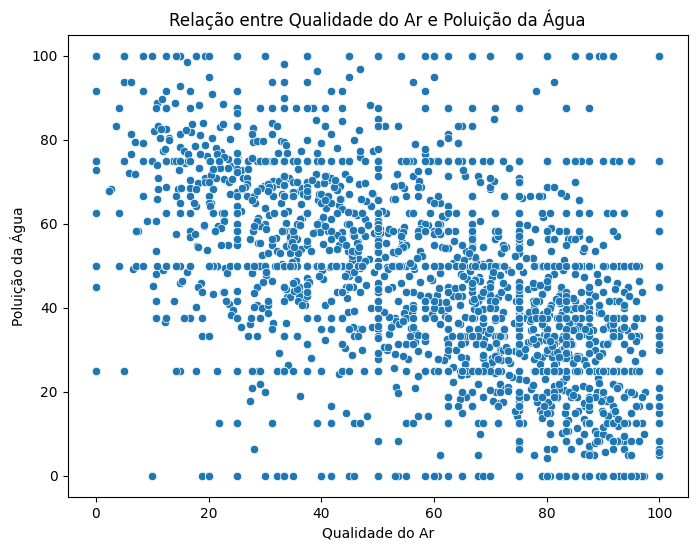

In [15]:
# Scatter plot para explorar a relação entre Qualidade do Ar e Poluição da Água
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_poluicao_agua_ar, x='Qualidade do Ar', y='Poluição da Água')
plt.title('Relação entre Qualidade do Ar e Poluição da Água')
plt.xlabel('Qualidade do Ar')
plt.ylabel('Poluição da Água')
plt.show()

In [16]:
# Calcular e imprimir a correlação
correlation = df_poluicao_agua_ar['Qualidade do Ar'].corr(df_poluicao_agua_ar['Poluição da Água'])
print("Correlação entre Qualidade do Ar e Poluição da Água:", correlation)

Correlação entre Qualidade do Ar e Poluição da Água: -0.45417262259393165


A correlação de aproximadamente -0.454 entre a Qualidade do Ar e a Poluição da Água indica uma relação negativa moderada entre estas duas variáveis. Aqui está o que isso significa em termos mais práticos:

1.	Natureza Negativa: A correlação negativa significa que, em geral, à medida que a qualidade do ar melhora (representada por um índice mais baixo, assumindo que números mais baixos indicam melhor qualidade), a poluição da água tende a ser maior (índice mais alto indica mais poluição). Isso pode parecer contra-intuitivo, mas pode ocorrer devido a vários fatores ambientais e industriais que influenciam essas medidas de maneiras complexas.
2.	Moderada: O valor de -0.454 não é extremamente próximo de -1, o que significaria uma correlação negativa perfeita, mas ainda é substancial o suficiente para sugerir uma tendência discernível. Isso indica que, embora haja uma associação entre as duas variáveis, outros fatores também podem estar influenciando os índices de qualidade do ar e poluição da água.

Implicações e Considerações

•	Complexidade Ambiental: A qualidade do ar e a poluição da água podem ser afetadas por diferentes fontes e processos. Por exemplo, uma cidade pode ter uma indústria pesada que polui mais a água do que o ar, ou medidas de controle podem ser mais eficazes para um tipo de poluição do que para outro.

•	Políticas e Regulamentações: Intervenções locais, como regulamentações ambientais rigorosas para a qualidade do ar, mas menos controle sobre fontes de poluição da água, podem resultar em melhor qualidade do ar mas água mais poluída.

•	Fatores Geográficos: A localização geográfica das cidades pode influenciar tanto a qualidade do ar quanto a poluição da água de maneiras diferentes, dependendo de fatores como corpos de água próximos, padrões climáticos e topografia.

Recomendações para Análise Adicional

•	Explorar Causas Potenciais: Seria útil examinar dados adicionais ou realizar estudos focados para entender as causas específicas dessa correlação em contextos particulares.

•	Analisar Dados Temporais: Se os dados forem disponíveis ao longo do tempo, análises de tendências poderiam revelar como a relação entre qualidade do ar e poluição da água evoluiu, ajudando a identificar eventos ou políticas significativas.

•	Incluir Mais Variáveis: Integrar outras variáveis ambientais ou socioeconômicas pode ajudar a entender melhor o contexto em que essa correlação ocorre e identificar fatores confundentes.

Essa correlação é um ponto de partida interessante para investigações mais profundas sobre como as práticas urbanas e industriais estão impactando o meio ambiente nas cidades analisadas. Com isso, vamos juntar todas as tabelas para criar e entender melhor os dados de forma combinada.

### 5.3.3. Analisar os Paises e Cidades que mais poluem a água e os melhores com qualidade no ar

/var/folders/38/6x4f55x100b7srd3m42bprm80000gn/T/ipykernel_1715/1201191582.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Poluição da Água', y='Entidade', data=top_10_countries, palette='viridis')


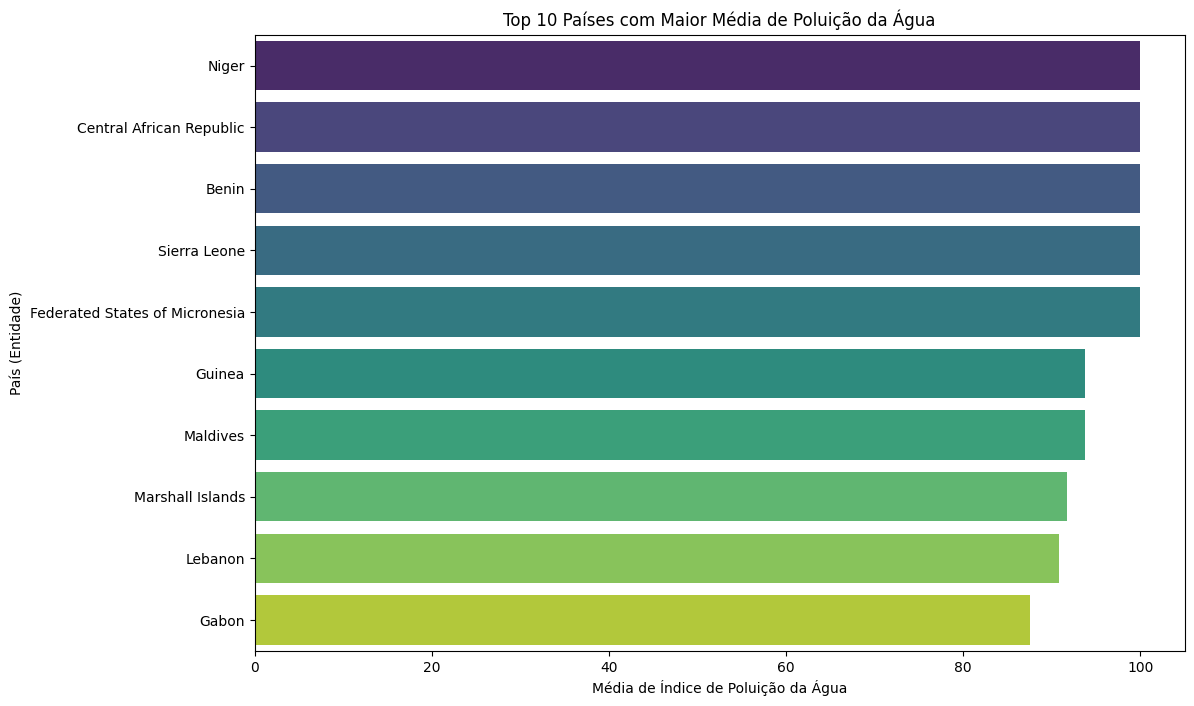

In [17]:
## Primeiro será analisado os tops 10 paises, depois as 20 maiores cidades que causam poluiçao na água

# Agregar os dados por Entidade e calcular a média da Poluição da Água
df_tratado = df_poluicao_agua_ar.groupby('Entidade')['Poluição da Água'].mean().reset_index()

# Ordenar os dados pela média de Poluição da Água e selecionar os top 10
top_10_countries = df_tratado.sort_values(by='Poluição da Água', ascending=False).head(10)

# Criar um gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='Poluição da Água', y='Entidade', data=top_10_countries, palette='viridis')
plt.title('Top 10 Países com Maior Média de Poluição da Água')
plt.xlabel('Média de Índice de Poluição da Água')
plt.ylabel('País (Entidade)')
plt.show()

/var/folders/38/6x4f55x100b7srd3m42bprm80000gn/T/ipykernel_1715/407579156.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Poluição da Água', y='Cidade', data=sorted_df, palette='viridis')


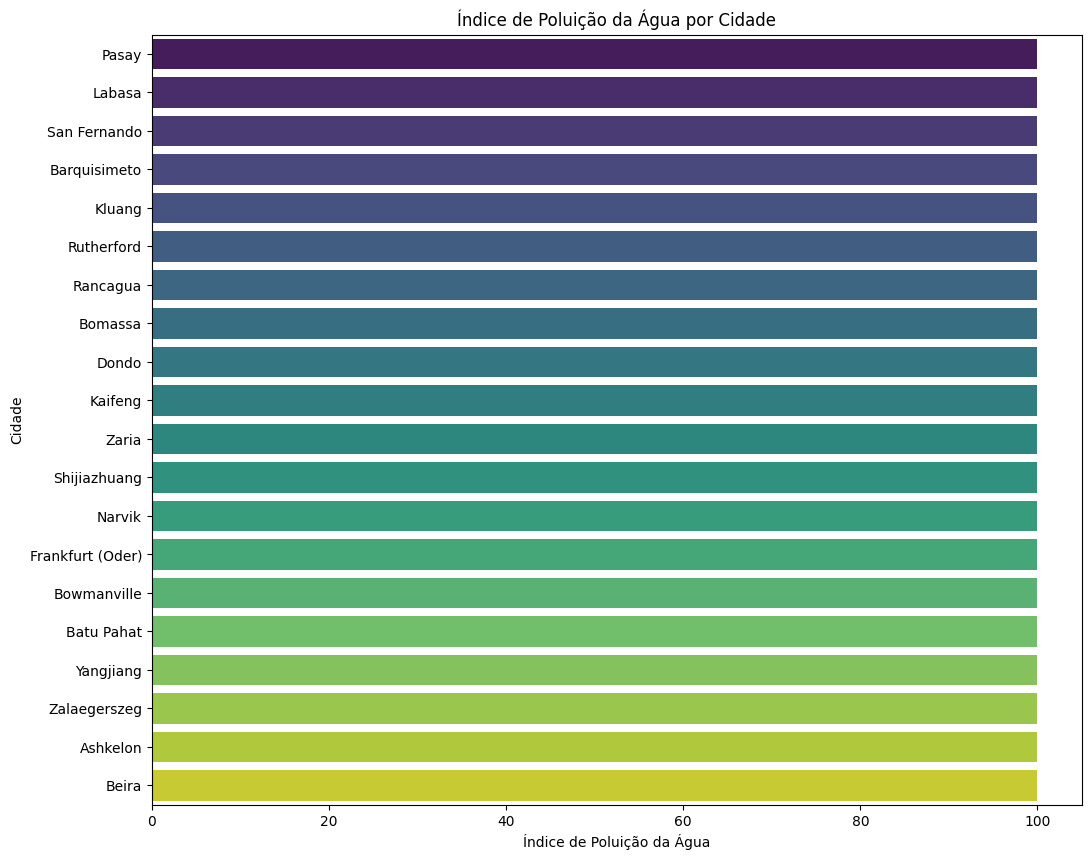

In [18]:
# Criar um gráfico de barras que mostre a poluição da água nas cidades, organizado do maior para o menor índice de poluição, 
# Este gráfico será útil para visualizar rapidamente quais cidades enfrentam os maiores desafios com a poluição da água.

# Ordenar os dados pela coluna de Poluição da Água do maior para o menor e limitar a 20 cidades com maior poluiçao
sorted_df = df_poluicao_agua_ar.sort_values(by='Poluição da Água', ascending=False).head(20)

# Criar um gráfico de barras
plt.figure(figsize=(12, 10))
sns.barplot(x='Poluição da Água', y='Cidade', data=sorted_df, palette='viridis')
plt.title('Índice de Poluição da Água por Cidade')
plt.xlabel('Índice de Poluição da Água')
plt.ylabel('Cidade')
plt.show()

/var/folders/38/6x4f55x100b7srd3m42bprm80000gn/T/ipykernel_1715/2696790649.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Qualidade do Ar', y='Entidade', data=top_10_melhor_qualidade_ar, palette='Blues_d')


Text(0, 0.5, 'País (Entidade)')

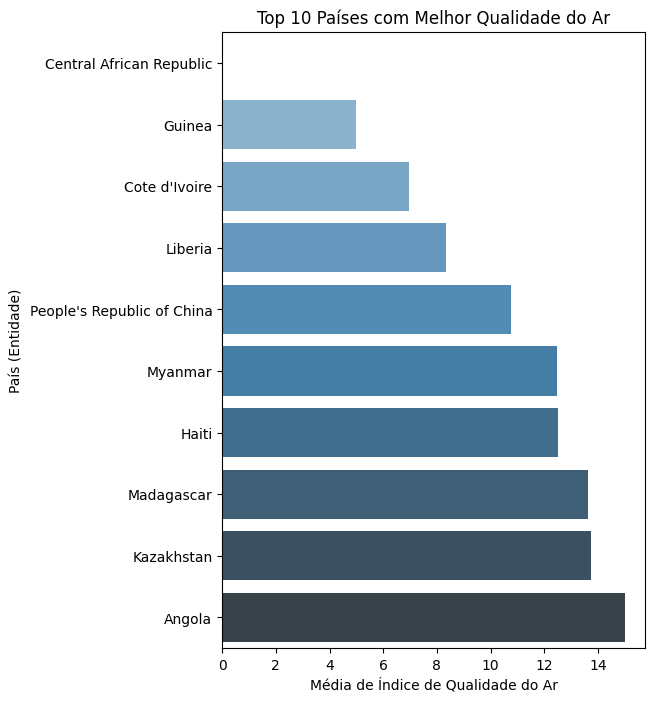

In [19]:
# Agregar os dados por Entidade e calcular a média da Qualidade do Ar
df_qualidade_ar = df_poluicao_agua_ar.groupby('Entidade')['Qualidade do Ar'].mean().reset_index()

# Ordenar os dados pela média de Qualidade do Ar e selecionar os top 10 para melhor e pior qualidade do ar
top_10_melhor_qualidade_ar = df_qualidade_ar.sort_values(by='Qualidade do Ar', ascending=True).head(10)
top_10_pior_qualidade_ar = df_qualidade_ar.sort_values(by='Qualidade do Ar', ascending=False).head(10)

# Criar gráficos de barras
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)  # Subplot para melhor qualidade do ar
sns.barplot(x='Qualidade do Ar', y='Entidade', data=top_10_melhor_qualidade_ar, palette='Blues_d')
plt.title('Top 10 Países com Melhor Qualidade do Ar')
plt.xlabel('Média de Índice de Qualidade do Ar')
plt.ylabel('País (Entidade)')

/var/folders/38/6x4f55x100b7srd3m42bprm80000gn/T/ipykernel_1715/809694729.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Qualidade do Ar', y='Entidade', data=top_10_pior_qualidade_ar, palette='Reds_d')


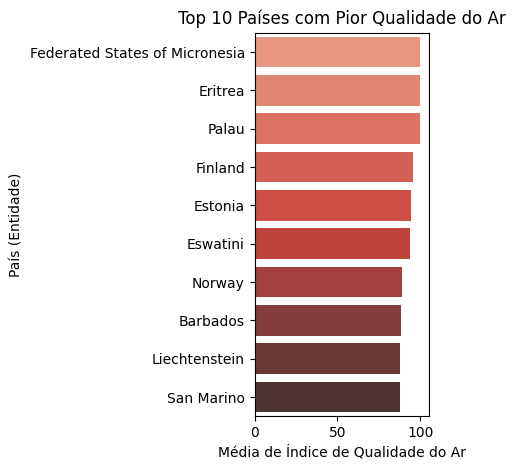

In [20]:
plt.subplot(1, 2, 2)  # Subplot para pior qualidade do ar
sns.barplot(x='Qualidade do Ar', y='Entidade', data=top_10_pior_qualidade_ar, palette='Reds_d')
plt.title('Top 10 Países com Pior Qualidade do Ar')
plt.xlabel('Média de Índice de Qualidade do Ar')
plt.ylabel('País (Entidade)')

plt.tight_layout()
plt.show()

# 5.4. Análise final - Criar o texto com a relaçao entre poluiçao da água e qualidade do ar, podmeos já perceber que os paises/cidades que poluem, nao tem boa qualidade no ar.

## 6. Tratar os arquicos para terem as mesmas colunas e Códigos

### 6.1. Analisar o nome da coluna de todos os arquivos em ordem crescente, do 1 até o 5.

In [21]:
# Primeiro precisamos saber o nome das colunas em cada base. Será utilizado somente o método Head para analisar as primeiras linhas com o nome 
# das colunas
df_producao_plastico.head()



,Entidade,Ano,Produção Anual de Plástico
0,Mundo,1950,2000000
1,Mundo,1951,2000000
2,Mundo,1952,2000000
3,Mundo,1953,3000000
4,Mundo,1954,3000000


In [22]:
df_residuos

,Entidade,Código,Ano,Participação na emissão global de plásticos para o oceano
0,Africa,NaN,2019,7.989317
1,Albania,ALB,2019,0.159782
2,Algeria,DZA,2019,0.589510
3,Angola,AGO,2019,0.087804
4,Antigua and Barbuda,ATG,2019,0.000204
...,...,...,...,...
165,Venezuela,VEN,2019,0.611359
166,Vietnam,VNM,2019,2.881287
167,Western Sahara,ESH,2019,0.003880
168,Yemen,YEM,2019,0.025729


In [23]:
df_destino

,Entidade,Código,Ano,Participação da reciclagem do lixo total regional,Participação da queima do lixo total regional,Participação do lixo descartado e mal gerido do total regional,Participação do lixo encaminhado para aterros do total regional
0,Americas (excl. USA),NaN,2000,4.721963,1.220057,32.702644,61.355328
1,Americas (excl. USA),NaN,2001,4.972505,1.208672,32.651270,61.167557
2,Americas (excl. USA),NaN,2002,5.227469,1.197566,32.610554,60.964405
3,Americas (excl. USA),NaN,2003,5.482511,1.186352,32.546440,60.784700
4,Americas (excl. USA),NaN,2004,5.740007,1.175283,32.480970,60.603745
...,...,...,...,...,...,...,...
195,World,OWID_WRL,2015,8.164696,17.625141,24.083096,50.127070
196,World,OWID_WRL,2016,8.450203,18.084925,23.626896,49.837975
197,World,OWID_WRL,2017,8.747166,18.578430,23.199600,49.474804
198,World,OWID_WRL,2018,9.036769,19.083899,22.697952,49.181380


In [24]:
df_desperdicio

,Entidade,Código,Ano,Lixo plástico mal gerenciado por pessoa (kg por ano)
0,Africa,NaN,2019,10.465928
1,Albania,ALB,2019,24.239153
2,Algeria,DZA,2019,17.758995
3,Angola,AGO,2019,7.445279
4,Antigua and Barbuda,ATG,2019,6.463918
...,...,...,...,...
160,Vietnam,VNM,2019,11.536045
161,Western Sahara,ESH,2019,7.068729
162,World,OWID_WRL,2019,8.008551
163,Yemen,YEM,2019,10.004012


In [25]:
df_poluicao_agua_ar

,Cidade,Região,Entidade,Qualidade do Ar,Poluição da Água
0,New York City,New York,United States of America,46.816038,49.504950
1,"Washington, D.C.",District of Columbia,United States of America,66.129032,49.107143
2,San Francisco,California,United States of America,60.514019,43.000000
3,Berlin,NaN,Germany,62.364130,28.612717
4,Los Angeles,California,United States of America,36.621622,61.299435
...,...,...,...,...,...
3958,Yanbu,Medina Province,Saudi Arabia,0.000000,50.000000
3959,Cordoba,Andalusia,Spain,85.714286,8.333333
3960,Vic,Catalonia,Spain,100.000000,0.000000
3961,Segovia,Castile and Leon,Spain,100.000000,0.000000


### 6.2. Entender as linhas que contém na Entidade e Código de todas as bases e tratar agora para que nao tenhamos copias, nomes diferentes para o mesmo lugar.

Será feito a padronizaçao neste momento para que a análise tenha a menor margem de erro possível.

In [26]:
df_producao_plastico['Entidade'].unique()

array(['Mundo'], dtype=object)

In [27]:
df_residuos['Entidade'].unique()

array(['Africa', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Asia', 'Australia', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belgium', 'Belize', 'Benin',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cyprus',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'EU-27', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Europe',
       'Fiji', 'Finland', 'France', 'French Guiana', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guadeloupe',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'Hong Kong', 'Iceland', 'India', 'Indonesia', 'Iran',
       'Iraq', 'Ireland', 'Israel', 'Italy', 

In [28]:
df_destino['Entidade'].unique()

array(['Americas (excl. USA)', 'Asia (excl. China e India)', 'China',
       'Europe', 'India', 'Middle East & North Africa', 'Oceania',
       'Sub-Saharan Africa', 'United States', 'World'], dtype=object)

In [29]:
df_desperdicio['Entidade'].unique()

array(['Africa', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Asia', 'Australia', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belgium', 'Belize', 'Benin',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cyprus',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Europe',
       'Fiji', 'Finland', 'France', 'French Guiana', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guadeloupe',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'Hong Kong', 'Iceland', 'India', 'Indonesia', 'Iran',
       'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica'

In [30]:
df_poluicao_agua_ar['Entidade'].unique()

array(['United States of America', 'Germany', 'Switzerland',
       'United Kingdom', 'Egypt', 'France', 'Canada', 'Brazil',
       'Lithuania', 'Monaco', 'Belgium', 'Poland', 'Uzbekistan', 'Italy',
       'Singapore', 'North Macedonia', 'Slovenia', 'Bulgaria', 'Norway',
       'Portugal', 'United Arab Emirates', 'Russia',
       "People's Republic of China", 'Georgia', 'India', 'Czech Republic',
       'Israel', 'Uruguay', 'Bangladesh', 'Pakistan', 'Croatia',
       'Philippines', 'Argentina', 'Mexico', 'Japan', 'Bolivia', 'Spain',
       "Cote d'Ivoire", 'Greece', 'Venezuela', 'Guatemala', 'Cuba',
       'Austria', 'Sweden', 'Finland', 'Ireland', 'Iceland', 'Estonia',
       'Latvia', 'Slovakia', 'Hungary', 'Luxembourg', 'Liechtenstein',
       'San Marino', 'Cambodia', 'Vietnam', 'Thailand', 'Andorra',
       'Malaysia', 'Taiwan', 'Ukraine', 'Chile', 'South Sudan', 'Armenia',
       'Tanzania', 'Sudan', 'Belarus', 'Somalia', 'The Bahamas', 'Yemen',
       'Colombia', 'Peru', 'Ecuado

### 6.2.1. Depois de analisar os cinco arquivos, ficou nítido que será necessário utilizar a coluna Codigo para realizar o merge nos arquivos. Primeiro sera tratado o arquivo 1 e 5 que nao possuem a coluna Codigo, depois disso sera realizado o merge por etapas.

### 6.2.2. De acordo com os dados dos arquivos 1,2 e 3, foi identificado o Código do primeiro arquivo, com isso, conseguiremos impantar a coluna sem problemas e gerar o merge.

In [31]:
# Adicionar a coluna 'Código' com o valor 'OWID_WRL' em todas as linhas. Será feito isso pois o valor é igual em todas as linhas,
# entao nao tem problemas fazer desta maneira.
df_producao_plastico['Código'] = 'OWID_WRL'

df_producao_plastico.head()

,Entidade,Ano,Produção Anual de Plástico,Código
0,Mundo,1950,2000000,OWID_WRL
1,Mundo,1951,2000000,OWID_WRL
2,Mundo,1952,2000000,OWID_WRL
3,Mundo,1953,3000000,OWID_WRL
4,Mundo,1954,3000000,OWID_WRL


In [32]:
# Salvar os dados

df_producao_plastico.to_csv('Arquivo_1.csv', index=False)
df_residuos.to_csv('Arquivo_2.csv', index=False)
df_destino.to_csv('Arquivo_3.csv', index=False)
df_desperdicio.to_csv('Arquivo_4.csv', index=False)
df_poluicao_agua_ar.to_csv('Arquivo_5.csv', index=False)

### 6.3. Criar um DataFrame de Mapeamento

### 6.3.1. Coletar todas as Entidades sem duplicadas

In [33]:
# Extrair as entidades únicas de cada DataFrame
entidades_df1 = set(df_producao_plastico['Entidade'].unique())
entidades_df2 = set(df_residuos['Entidade'].unique())
entidades_df3 = set(df_destino['Entidade'].unique())
entidades_df4 = set(df_desperdicio['Entidade'].unique())
entidades_df5= set(df_poluicao_agua_ar['Entidade'].unique())



In [34]:
# Combinar todas as entidades únicas
todas_entidades = entidades_df1.union(entidades_df2).union(entidades_df3).union(entidades_df4).union(entidades_df5)

In [35]:
todas_entidades = pd.DataFrame(todas_entidades, columns=['Entidade'])
#todas_entidades.to_csv('Todas_Entidades.csv', index=False)

todas_entidades

,Entidade
0,Ukraine
1,Bhutan
2,Australia
3,North Korea
4,Federated States of Micronesia
...,...
218,North Macedonia
219,Zambia
220,Papua New Guinea
221,Asia


### 6.3.2. Criar a coluna Codigo e coletar de todos os DataFrames existentes, com isso vou saber o que temos e o que falta.

In [36]:
# Inicializar a coluna 'Código' com None
todas_entidades['Código'] = None
todas_entidades

,Entidade,Código
0,Ukraine,None
1,Bhutan,None
2,Australia,None
3,North Korea,None
4,Federated States of Micronesia,None
...,...,...
218,North Macedonia,None
219,Zambia,None
220,Papua New Guinea,None
221,Asia,None


In [37]:
# Função para atualizar os códigos no DataFrame de mapeamento, pois assim eu vou ter todas as Entidades e seus Códigos
def update_codigo(todas_entidades, source_df, entity_col='Entidade', code_col='Código'):
    for index, row in todas_entidades.iterrows():
        entity = row[entity_col]
        code = source_df[source_df[entity_col] == entity][code_col]
        if not code.empty:
            todas_entidades.at[index, code_col] = code.values[0]

In [38]:
# Atualizar os códigos usando os DataFrames fornecidos
update_codigo(todas_entidades, df_producao_plastico)
update_codigo(todas_entidades, df_residuos)
update_codigo(todas_entidades, df_destino)
update_codigo(todas_entidades, df_desperdicio)
#update_codigo(todas_entidades, df_poluicao_agua_ar)

### 6.3.4. Agora temos um DataFrame com todas as Entidades e seus Códigos.

In [39]:
todas_entidades.head(30)

,Entidade,Código
0,Ukraine,UKR
1,Bhutan,None
2,Australia,AUS
3,North Korea,PRK
4,Federated States of Micronesia,None
5,Ghana,GHA
6,Belgium,BEL
7,Venezuela,VEN
8,Timor-Leste,None
9,Nicaragua,NIC


In [40]:
# Verificar as entidades que ainda não têm código
entidades_sem_codigos = todas_entidades[todas_entidades['Código'].isnull()]
print("Entidades sem código:", entidades_sem_codigos)

Entidades sem código:                            Entidade Código
1                            Bhutan   None
4    Federated States of Micronesia   None
8                       Timor-Leste   None
13                         Ethiopia   None
14                           Uganda   None
..                              ...    ...
209                         Vanuatu   None
214      People's Republic of China   None
218                 North Macedonia   None
219                          Zambia   None
221                            Asia    NaN

[62 rows x 2 columns]


In [41]:
# Salvar os dados para eu analisar no Excel.
todas_entidades.to_csv('Todas_Entidades_tratado.csv', index=False)
entidades_sem_codigos.to_csv('Entidas_sem_codigos.csv', index=False)

### 6.3.5. Criar os Códigos que nao foram gerados

In [42]:
# Função para gerar código
def criar_codigos_unicos(entidade, codigos_existentes):
    base_code = entidade[:3].upper()
    code = base_code
    i = 1
    while code in codigos_existentes:
        code = f"{base_code}{i}"
        i += 1
    codigos_existentes.add(code)
    return code

# Conjunto de códigos existentes
codigos_existentes = set(todas_entidades['Código'].dropna().unique())

# Aplicar a função de geração de código
todas_entidades['Código'] = todas_entidades.apply(
    lambda row: criar_codigos_unicos(row['Entidade'], codigos_existentes) if pd.isnull(row['Código']) else row['Código'], axis=1
)

# Verificar o resultado final
print(todas_entidades)

                           Entidade Código
0                           Ukraine    UKR
1                            Bhutan    BHU
2                         Australia    AUS
3                       North Korea    PRK
4    Federated States of Micronesia    FED
..                              ...    ...
218                 North Macedonia   NOR2
219                          Zambia    ZAM
220                Papua New Guinea    PNG
221                            Asia   ASI1
222                          Brazil    BRA

[223 rows x 2 columns]


In [53]:
todas_entidades.to_csv('dim_entidades_criadas.csv', index=False)

### 6.3.6. Inserir nas linhas em branco os Códigos que estao presentes na tabela todas_entidades

In [43]:
import pandas as pd

# Função para preencher códigos faltantes
def fill_missing_codes(df, entidades_codigos):
    for index, row in df.iterrows():
        if pd.isnull(row['Código']):
            entidade = row['Entidade']
            codigo = entidades_codigos[entidades_codigos['Entidade'] == entidade]['Código'].values
            if len(codigo) > 0:
                df.at[index, 'Código'] = codigo[0]
    return df


# Preencher os códigos faltantes em cada DataFrame
df1_atualizado = fill_missing_codes(df_producao_plastico, todas_entidades)
df2_atualizado = fill_missing_codes(df_residuos, todas_entidades)
df3_atualizado = fill_missing_codes(df_destino, todas_entidades)
df4_atualizado = fill_missing_codes(df_desperdicio, todas_entidades)



### 6.4 Criar e preencher o Arquivo 5, pois ele nao tem a coluna Código

In [44]:
df_poluicao_agua_ar['Código'] = None

In [45]:
df_poluicao_agua_ar

,Cidade,Região,Entidade,Qualidade do Ar,Poluição da Água,Código
0,New York City,New York,United States of America,46.816038,49.504950,None
1,"Washington, D.C.",District of Columbia,United States of America,66.129032,49.107143,None
2,San Francisco,California,United States of America,60.514019,43.000000,None
3,Berlin,NaN,Germany,62.364130,28.612717,None
4,Los Angeles,California,United States of America,36.621622,61.299435,None
...,...,...,...,...,...,...
3958,Yanbu,Medina Province,Saudi Arabia,0.000000,50.000000,None
3959,Cordoba,Andalusia,Spain,85.714286,8.333333,None
3960,Vic,Catalonia,Spain,100.000000,0.000000,None
3961,Segovia,Castile and Leon,Spain,100.000000,0.000000,None


In [46]:
df5_atualizado = fill_missing_codes(df_poluicao_agua_ar, todas_entidades)
df5_atualizado

,Cidade,Região,Entidade,Qualidade do Ar,Poluição da Água,Código
0,New York City,New York,United States of America,46.816038,49.504950,UNI
1,"Washington, D.C.",District of Columbia,United States of America,66.129032,49.107143,UNI
2,San Francisco,California,United States of America,60.514019,43.000000,UNI
3,Berlin,NaN,Germany,62.364130,28.612717,DEU
4,Los Angeles,California,United States of America,36.621622,61.299435,UNI
...,...,...,...,...,...,...
3958,Yanbu,Medina Province,Saudi Arabia,0.000000,50.000000,SAU
3959,Cordoba,Andalusia,Spain,85.714286,8.333333,ESP
3960,Vic,Catalonia,Spain,100.000000,0.000000,ESP
3961,Segovia,Castile and Leon,Spain,100.000000,0.000000,ESP


In [54]:
df5_atualizado = df5_atualizado[['Código','Entidade','Região','Cidade','Qualidade do Ar','Poluição da Água']]

In [55]:
df5_atualizado

,Código,Entidade,Região,Cidade,Qualidade do Ar,Poluição da Água
0,UNI,United States of America,New York,New York City,46.816038,49.504950
1,UNI,United States of America,District of Columbia,"Washington, D.C.",66.129032,49.107143
2,UNI,United States of America,California,San Francisco,60.514019,43.000000
3,DEU,Germany,NaN,Berlin,62.364130,28.612717
4,UNI,United States of America,California,Los Angeles,36.621622,61.299435
...,...,...,...,...,...,...
3958,SAU,Saudi Arabia,Medina Province,Yanbu,0.000000,50.000000
3959,ESP,Spain,Andalusia,Cordoba,85.714286,8.333333
3960,ESP,Spain,Catalonia,Vic,100.000000,0.000000
3961,ESP,Spain,Castile and Leon,Segovia,100.000000,0.000000


# 7. Realizar o Merge das tabelas

### 7.1. Ligaçao do arquivo 5 com 1 

In [56]:
df_producao_plastico

,Entidade,Ano,Produção Anual de Plástico,Código
0,Mundo,1950,2000000,OWID_WRL
1,Mundo,1951,2000000,OWID_WRL
2,Mundo,1952,2000000,OWID_WRL
3,Mundo,1953,3000000,OWID_WRL
4,Mundo,1954,3000000,OWID_WRL
...,...,...,...,...
64,Mundo,2015,381000000,OWID_WRL
65,Mundo,2016,400050000,OWID_WRL
66,Mundo,2017,420052500,OWID_WRL
67,Mundo,2018,441055140,OWID_WRL


In [58]:
df5_atualizado

,Código,Entidade,Região,Cidade,Qualidade do Ar,Poluição da Água
0,UNI,United States of America,New York,New York City,46.816038,49.504950
1,UNI,United States of America,District of Columbia,"Washington, D.C.",66.129032,49.107143
2,UNI,United States of America,California,San Francisco,60.514019,43.000000
3,DEU,Germany,NaN,Berlin,62.364130,28.612717
4,UNI,United States of America,California,Los Angeles,36.621622,61.299435
...,...,...,...,...,...,...
3958,SAU,Saudi Arabia,Medina Province,Yanbu,0.000000,50.000000
3959,ESP,Spain,Andalusia,Cordoba,85.714286,8.333333
3960,ESP,Spain,Catalonia,Vic,100.000000,0.000000
3961,ESP,Spain,Castile and Leon,Segovia,100.000000,0.000000


In [59]:
# Fazer o merge dos DataFrames usando a coluna "Código", Arquivo 1 e 5
df_combinado = pd.merge(df5_atualizado, df_producao_plastico, how='outer')
df_combinado.to_csv('df_combinado.csv', index=False)

In [60]:
df_combinado

,Código,Entidade,Região,Cidade,Qualidade do Ar,Poluição da Água,Ano,Produção Anual de Plástico
0,AFG,Afghanistan,Kabul,Kabul,18.421053,81.060606,NaN,NaN
1,AFG,Afghanistan,Herat,Herat,43.750000,31.250000,NaN,NaN
2,AFG,Afghanistan,Kandahar,Kandahar,0.000000,75.000000,NaN,NaN
3,AFG,Afghanistan,Balkh,Mazar-i-Sharif,11.111111,83.333333,NaN,NaN
4,AFG,Afghanistan,Farah,Farah,100.000000,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...
4027,ZAM,Zambia,Luapula Province,Mansa,75.000000,25.000000,NaN,NaN
4028,ZWE,Zimbabwe,NaN,Harare,38.461538,87.500000,NaN,NaN
4029,ZWE,Zimbabwe,NaN,Bulawayo,67.857143,71.428571,NaN,NaN
4030,ZWE,Zimbabwe,NaN,Masvingo,25.000000,62.500000,NaN,NaN


### 7.2. Combinaçao do arquivo combinado com arquivo 2

In [61]:
df_residuos

,Entidade,Código,Ano,Participação na emissão global de plásticos para o oceano
0,Africa,AFR,2019,7.989317
1,Albania,ALB,2019,0.159782
2,Algeria,DZA,2019,0.589510
3,Angola,AGO,2019,0.087804
4,Antigua and Barbuda,ATG,2019,0.000204
...,...,...,...,...
165,Venezuela,VEN,2019,0.611359
166,Vietnam,VNM,2019,2.881287
167,Western Sahara,ESH,2019,0.003880
168,Yemen,YEM,2019,0.025729


In [62]:
# Fazer o merge dos DataFrames usando a coluna "Código", Arquivo 2 e 5
df_combinado_dois = pd.merge(df_combinado, df_residuos, how='outer')
df_combinado_dois.to_csv('df_combinado_dois.csv', index=False)
df_combinado_dois

,Código,Entidade,Região,Cidade,Qualidade do Ar,Poluição da Água,Ano,Produção Anual de Plástico,Participação na emissão global de plásticos para o oceano
0,AFG,Afghanistan,Kabul,Kabul,18.421053,81.060606,NaN,NaN,NaN
1,AFG,Afghanistan,Herat,Herat,43.750000,31.250000,NaN,NaN,NaN
2,AFG,Afghanistan,Kandahar,Kandahar,0.000000,75.000000,NaN,NaN,NaN
3,AFG,Afghanistan,Balkh,Mazar-i-Sharif,11.111111,83.333333,NaN,NaN,NaN
4,AFG,Afghanistan,Farah,Farah,100.000000,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4197,ZWE,Zimbabwe,NaN,NaN,NaN,NaN,2019.0,NaN,0.0
4198,ZWE,Zimbabwe,NaN,Harare,38.461538,87.500000,NaN,NaN,NaN
4199,ZWE,Zimbabwe,NaN,Bulawayo,67.857143,71.428571,NaN,NaN,NaN
4200,ZWE,Zimbabwe,NaN,Masvingo,25.000000,62.500000,NaN,NaN,NaN


### 7.3. Combinaçao do arquivo combinado com arquivo 3

In [63]:
df_destino

,Entidade,Código,Ano,Participação da reciclagem do lixo total regional,Participação da queima do lixo total regional,Participação do lixo descartado e mal gerido do total regional,Participação do lixo encaminhado para aterros do total regional
0,Americas (excl. USA),AME,2000,4.721963,1.220057,32.702644,61.355328
1,Americas (excl. USA),AME,2001,4.972505,1.208672,32.651270,61.167557
2,Americas (excl. USA),AME,2002,5.227469,1.197566,32.610554,60.964405
3,Americas (excl. USA),AME,2003,5.482511,1.186352,32.546440,60.784700
4,Americas (excl. USA),AME,2004,5.740007,1.175283,32.480970,60.603745
...,...,...,...,...,...,...,...
195,World,OWID_WRL,2015,8.164696,17.625141,24.083096,50.127070
196,World,OWID_WRL,2016,8.450203,18.084925,23.626896,49.837975
197,World,OWID_WRL,2017,8.747166,18.578430,23.199600,49.474804
198,World,OWID_WRL,2018,9.036769,19.083899,22.697952,49.181380


In [67]:
# Fazer o merge dos DataFrames usando a coluna "Código", Arquivo 3 e 5
df_combinado_tres = pd.merge(df_combinado_dois, df_destino, how='outer')
df_combinado_tres.to_csv('df_combinado_tres.csv', index=False)
df_combinado_tres

,Código,Entidade,Região,Cidade,Qualidade do Ar,Poluição da Água,Ano,Produção Anual de Plástico,Participação na emissão global de plásticos para o oceano,Participação da reciclagem do lixo total regional,Participação da queima do lixo total regional,Participação do lixo descartado e mal gerido do total regional,Participação do lixo encaminhado para aterros do total regional
0,AFG,Afghanistan,Kabul,Kabul,18.421053,81.060606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,Herat,Herat,43.750000,31.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,Kandahar,Kandahar,0.000000,75.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,Balkh,Mazar-i-Sharif,11.111111,83.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,Farah,Farah,100.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4392,ZWE,Zimbabwe,NaN,NaN,NaN,NaN,2019.0,NaN,0.0,NaN,NaN,NaN,NaN
4393,ZWE,Zimbabwe,NaN,Harare,38.461538,87.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4394,ZWE,Zimbabwe,NaN,Bulawayo,67.857143,71.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4395,ZWE,Zimbabwe,NaN,Masvingo,25.000000,62.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 7.4. Combinaçao do arquivo combinado com arquivo 4

In [65]:
df_desperdicio

,Entidade,Código,Ano,Lixo plástico mal gerenciado por pessoa (kg por ano)
0,Africa,AFR,2019,10.465928
1,Albania,ALB,2019,24.239153
2,Algeria,DZA,2019,17.758995
3,Angola,AGO,2019,7.445279
4,Antigua and Barbuda,ATG,2019,6.463918
...,...,...,...,...
160,Vietnam,VNM,2019,11.536045
161,Western Sahara,ESH,2019,7.068729
162,World,OWID_WRL,2019,8.008551
163,Yemen,YEM,2019,10.004012


In [68]:
# Fazer o merge dos DataFrames usando a coluna "Código", Arquivo 4 e 5
df_combinado_quatro = pd.merge(df_combinado_tres, df_desperdicio, how='outer')
df_combinado_quatro.to_csv('df_combinado_quatro.csv', index=False)
df_combinado_quatro

,Código,Entidade,Região,Cidade,Qualidade do Ar,Poluição da Água,Ano,Produção Anual de Plástico,Participação na emissão global de plásticos para o oceano,Participação da reciclagem do lixo total regional,Participação da queima do lixo total regional,Participação do lixo descartado e mal gerido do total regional,Participação do lixo encaminhado para aterros do total regional,Lixo plástico mal gerenciado por pessoa (kg por ano)
0,AFG,Afghanistan,Kabul,Kabul,18.421053,81.060606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,Herat,Herat,43.750000,31.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,Kandahar,Kandahar,0.000000,75.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,Balkh,Mazar-i-Sharif,11.111111,83.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,Farah,Farah,100.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4392,ZWE,Zimbabwe,NaN,NaN,NaN,NaN,2019.0,NaN,0.0,NaN,NaN,NaN,NaN,35.839194
4393,ZWE,Zimbabwe,NaN,Harare,38.461538,87.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4394,ZWE,Zimbabwe,NaN,Bulawayo,67.857143,71.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4395,ZWE,Zimbabwe,NaN,Masvingo,25.000000,62.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
